In [23]:
from utilityFunctions import load_csv_to_matrix_batch, compute_color_preference_distance_batch, show_heatmaps, compute_color_similarity_distance_batch, compute_correlations, RSA, split_and_average_matrices, perform_mds_and_plot, RSA
from utilityFunctions_GWOT import compute_GWOT_for_all_pairs
import numpy as np
import pickle
import os
import random

In [2]:
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)
folder_path = 'raw_data/202411_data'

In [3]:
filename = "list_average_of_all_possible_splitting_preference_reordered_raw.pkl"

if os.path.exists(filename):
    with open(filename, "rb") as file:
        grouping_averaged_allcombination_preference = pickle.load(file)
    print("Results successfully loaded.")
else:
    print(f"Error: The file '{filename}' does not exist.")

print(type(grouping_averaged_allcombination_preference))
print(len(grouping_averaged_allcombination_preference))
print(len(grouping_averaged_allcombination_preference[0]))
print(type(grouping_averaged_allcombination_preference[0][0]))

Results successfully loaded.
<class 'list'>
100
2
<class 'numpy.ndarray'>


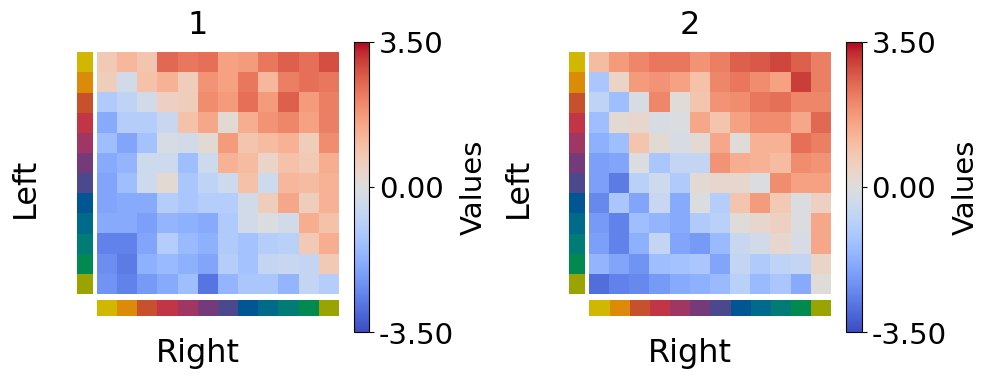

In [16]:
pair_of_preference = grouping_averaged_allcombination_preference[1]
show_heatmaps(vmin_val=-3.5, vmax_val=3.5, matrices=list(pair_of_preference), titles=list(range(1, 3)), nrows=1, ncols=2, cmap_name = "coolwarm", cbar_label="Values", color_labels=unique_colours)

In [17]:
filename = "list_average_of_all_possible_splitting_preference_reordered_distance.pkl"

if os.path.exists(filename):
    with open(filename, "rb") as file:
        grouping_averaged_allcombination_preference_distance = pickle.load(file)
    print("Results successfully loaded.")
else:
    print(f"Error: The file '{filename}' does not exist.")

print(type(grouping_averaged_allcombination_preference_distance))
print(len(grouping_averaged_allcombination_preference_distance))
print(len(grouping_averaged_allcombination_preference_distance[0]))
print(type(grouping_averaged_allcombination_preference_distance[0][0]))

Results successfully loaded.
<class 'list'>
100
2
<class 'numpy.ndarray'>


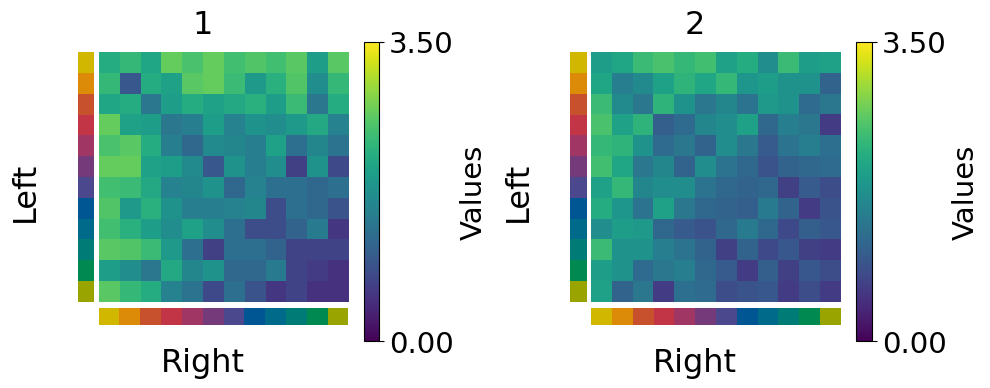

In [18]:
pair_of_preference_distance = grouping_averaged_allcombination_preference_distance[0]
show_heatmaps(vmin_val=0, vmax_val=3.5, matrices=list(pair_of_preference_distance), titles=list(range(1, 3)), nrows=1, ncols=2, cmap_name="viridis", cbar_label="Values", color_labels=unique_colours)

In [19]:
from utilityFunctions_GWOT import GWD_and_find_best, GWD_and_plot

In [20]:
len(pair_of_preference)

2

In [21]:
### GWOT configuration
n_eps = 15 # number of epsilon values tried
eps_range = [0.04, 5] # the range of epsilon searched
epsilons = np.logspace(np.log10(eps_range[0]), np.log10(eps_range[1]), n_eps) # epsilon values

/opt/anaconda3/envs/condapreferencequalia/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


Best epsilon: 0.04000000000000001, Minimum GWD: 0.449


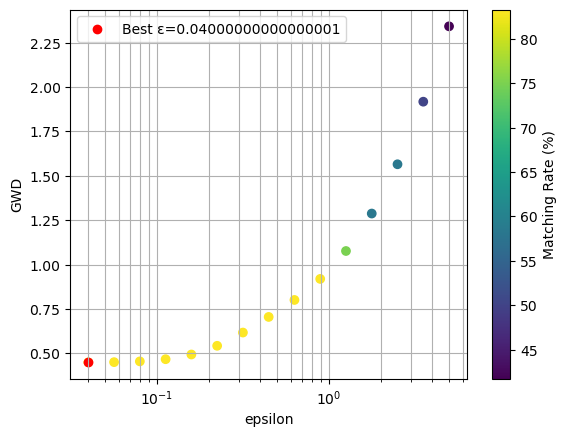

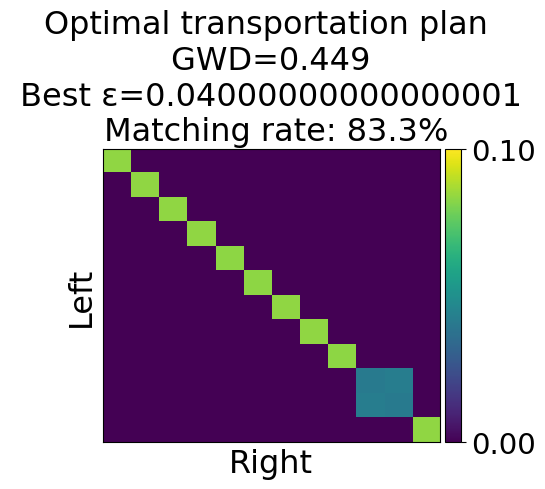

(array([[8.33025671e-002, 3.07661974e-005, 6.01215858e-022,
         1.61604227e-037, 2.40857635e-034, 1.80774919e-070,
         6.97891829e-097, 1.11072586e-121, 1.41152883e-154,
         2.21404106e-175, 7.81522931e-178, 6.33244492e-251],
        [3.30211995e-007, 8.33330031e-002, 9.44696133e-012,
         1.60570096e-025, 5.11288603e-018, 6.96600841e-041,
         1.53509383e-067, 1.26347566e-092, 1.27603269e-116,
         1.53933939e-135, 2.42321333e-142, 8.24999796e-207],
        [2.95912755e-025, 1.67257387e-010, 8.33329949e-002,
         3.19883829e-010, 3.37944876e-007, 9.47702832e-023,
         9.18680744e-040, 1.83481718e-058, 9.10100684e-085,
         8.82612418e-102, 2.71013035e-103, 4.88387666e-159],
        [7.70852557e-055, 2.34305871e-029, 1.05716316e-007,
         8.32737502e-002, 5.94774215e-005, 5.55111677e-013,
         3.78941257e-021, 3.85645330e-028, 2.53806922e-047,
         1.02132057e-059, 8.31407831e-060, 7.59823699e-107],
        [1.86314854e-064, 1.13469773

In [22]:
GWD_and_plot(pair_of_preference[0], pair_of_preference[1], epsilons)

/opt/anaconda3/envs/condapreferencequalia/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


Best epsilon: 0.04000000000000001, Minimum GWD: 0.200


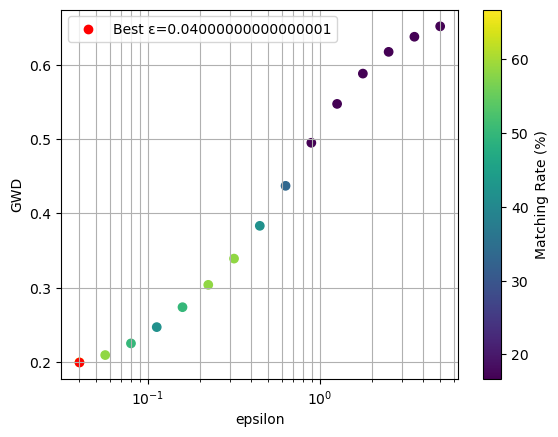

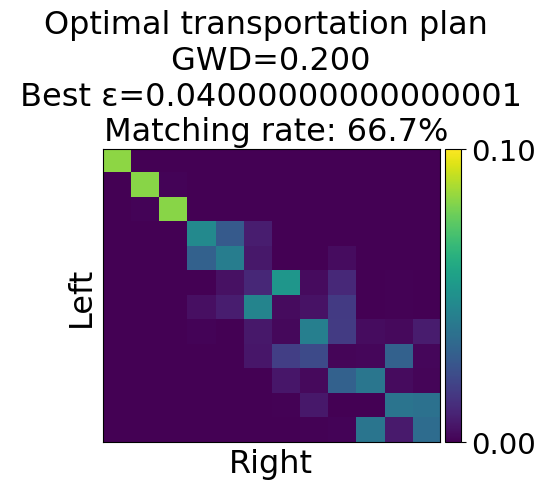

(array([[8.30978296e-02, 2.35234921e-04, 2.68841156e-07, 1.23929476e-13,
         1.75456842e-14, 2.07473958e-16, 7.38282515e-20, 9.31928012e-19,
         9.56614697e-23, 5.95067174e-29, 2.51039202e-26, 3.48300772e-32],
        [3.46955117e-04, 8.20808928e-02, 9.05483341e-04, 2.03090909e-09,
         1.12355856e-11, 6.13921318e-12, 1.03225580e-16, 4.01206000e-13,
         4.75650301e-17, 2.88956721e-21, 5.03882684e-19, 2.05159957e-20],
        [4.45551882e-07, 1.10393532e-03, 8.22198026e-02, 1.26636656e-06,
         4.22737908e-06, 2.94958858e-06, 2.83830331e-09, 7.03336279e-07,
         3.86563839e-10, 6.27538664e-15, 8.57811140e-12, 3.45452006e-15],
        [3.11756890e-13, 5.50496596e-08, 2.80798671e-04, 4.69097871e-02,
         2.81319332e-02, 7.96014761e-03, 4.20581251e-07, 7.12486419e-06,
         4.29985940e-05, 2.52786348e-09, 4.18564456e-08, 2.32776334e-08],
        [2.81906418e-18, 1.89518672e-12, 1.25650818e-07, 3.11065217e-02,
         4.24691164e-02, 6.34107709e-03, 6.4040

In [14]:
GWD_and_plot(pair_of_preference_distance[0], pair_of_preference_distance[1], epsilons)

In [24]:
RSA(pair_of_preference[0], pair_of_preference[1])

np.float64(0.9110853367450682)

In [25]:
RSA(pair_of_preference_distance[0], pair_of_preference_distance[1])

np.float64(0.7622877191185896)